Aplicação da Regressão Linear (Mercado Financeiro)

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

In [13]:
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

del data["Dividends"]
del data["Stock Splits"]

data.dropna()

data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-04 00:00:00-03:00,14.357677,14.409713,14.223250,14.327323,10339200
2022-07-05 00:00:00-03:00,14.253599,14.318645,14.023773,14.249264,17375800
2022-07-06 00:00:00-03:00,14.171210,14.344665,13.963065,14.158201,21683600
2022-07-07 00:00:00-03:00,14.288293,14.479092,14.288293,14.366347,19425200
2022-07-08 00:00:00-03:00,14.383694,14.587504,14.335996,14.505114,17998200


In [14]:
# Definindo correlação 

correlacao = pd.DataFrame(data)

correlacao_aplicada = correlacao.corr()

# Definindo X e y
X = data['Open'].values
y = data['High'].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

correlacao_aplicada

,Open,High,Low,Close,Volume
Open,1.000000,0.999058,0.998921,0.997740,-0.377214
High,0.999058,1.000000,0.998930,0.999060,-0.364073
Low,0.998921,0.998930,1.000000,0.999115,-0.388116
Close,0.997740,0.999060,0.999115,1.000000,-0.374507
Volume,-0.377214,-0.364073,-0.388116,-0.374507,1.000000


Text(0, 0.5, 'High')

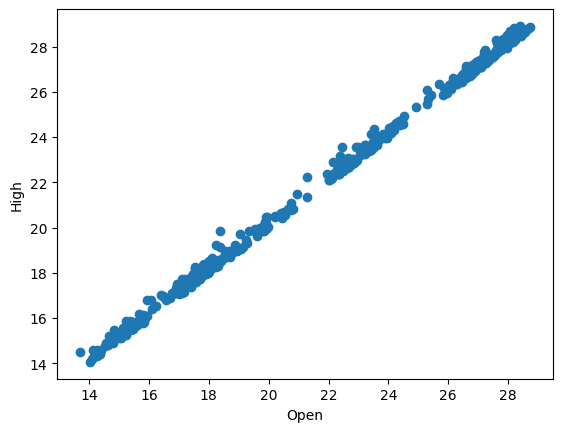

In [15]:
# Mostrar o espalhamento dos dados

plt.scatter(X, y)
plt.xlabel('Open')
plt.ylabel('High')

In [16]:
# Treinamento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Normalizando os dados

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.fit_transform(X_test)
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.fit_transform(y_test)

In [18]:
# Calculo da Regressão Linear

modelo_regressao = LinearRegression()

modelo_regressao.fit(X_train, y_train)

LinearRegression()

In [19]:
# Realizar Previsões

y_pred = modelo_regressao.predict(X_test)
y_pred

array([[16.48930296],
       [23.64362194],
       [22.71596892],
       [27.52393014],
       [24.62441917],
       [15.24584084],
       [28.82138779],
       [22.33372348],
       [19.10603272],
       [18.03371809],
       [23.74151064],
       [23.83008309],
       [22.87216844],
       [28.25205774],
       [18.38819418],
       [22.49102373],
       [27.47538945],
       [27.88034915],
       [17.77672191],
       [18.36329607],
       [19.96135799],
       [26.6752399 ],
       [23.78346866],
       [15.95376335],
       [18.93992088],
       [28.01420142],
       [15.74196952],
       [28.15497377],
       [15.41126228],
       [21.51650879],
       [27.86372298],
       [15.45041169],
       [15.77388002],
       [18.24150853],
       [26.62722931],
       [26.31881213],
       [23.11976933],
       [26.91230328],
       [22.72742473],
       [23.57369877],
       [23.45307875],
       [17.81702005],
       [27.34917897],
       [20.17576692],
       [18.62792895],
       [14

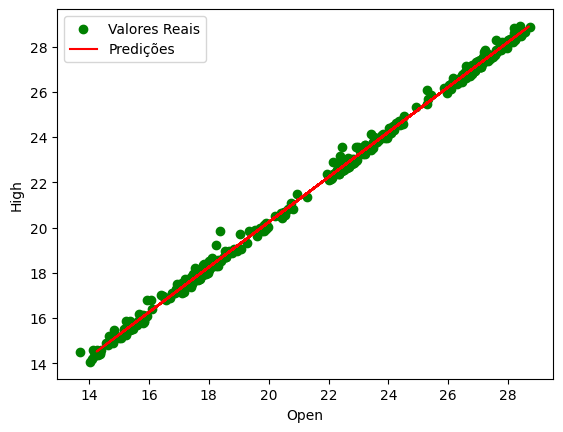

In [20]:
# Grafico Valores Reais x Predições
plt.scatter(X_train, y_train, color='green', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Predições')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()

In [21]:
# Calculando métricas de avaliação usando os valores na escala original
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Coeficiente de Determinação (R2): 0.9978285344971525
Erro Percentual Absoluto Médio (MAPE): 0.7312580642953012%
Erro Médio Absoluto (MAE): 0.15642233187031188
Erro Quadrático Médio (MSE): 0.041471894908338865


In [22]:
# Resultados
print("Previsões para os dias seguintes:")
for i, prediction in enumerate(y_pred, start=1):

    print(f"DIA {5+i:02d} DO DATASET ==> Previsto: {prediction[0]:.2f} || Real: {y_test[i-1][0]:.2f}")

    maiores = 0
    menores = 0
    for i, prediction in enumerate(y_pred):
        if prediction[0] > y_test[i][0]:
            maiores += 1
        if prediction[0] < y_test[i][0]:
            menores += 1

print(f"\nPrevisão maior que o Real: {maiores} de {len(y_test)}")
print(f"Previsão menor que o Real: {menores} de {len(y_test)}")

Previsões para os dias seguintes:
DIA 06 DO DATASET ==> Previsto: 16.49 || Real: 16.53
DIA 07 DO DATASET ==> Previsto: 23.64 || Real: 23.45
DIA 08 DO DATASET ==> Previsto: 22.72 || Real: 22.51
DIA 09 DO DATASET ==> Previsto: 27.52 || Real: 27.49
DIA 10 DO DATASET ==> Previsto: 24.62 || Real: 24.58
DIA 11 DO DATASET ==> Previsto: 15.25 || Real: 15.31
DIA 12 DO DATASET ==> Previsto: 28.82 || Real: 28.76
DIA 13 DO DATASET ==> Previsto: 22.33 || Real: 22.33
DIA 14 DO DATASET ==> Previsto: 19.11 || Real: 19.21
DIA 15 DO DATASET ==> Previsto: 18.03 || Real: 17.85
DIA 16 DO DATASET ==> Previsto: 23.74 || Real: 24.36
DIA 17 DO DATASET ==> Previsto: 23.83 || Real: 23.64
DIA 18 DO DATASET ==> Previsto: 22.87 || Real: 22.68
DIA 19 DO DATASET ==> Previsto: 28.25 || Real: 28.71
DIA 20 DO DATASET ==> Previsto: 18.39 || Real: 18.26
DIA 21 DO DATASET ==> Previsto: 22.49 || Real: 22.35
DIA 22 DO DATASET ==> Previsto: 27.48 || Real: 27.45
DIA 23 DO DATASET ==> Previsto: 27.88 || Real: 28.17
DIA 24 DO DA